In [177]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [178]:
from IPython import display

%matplotlib inline

In [179]:
import torch.nn as nn
import torch.nn.functional as F

In [189]:
import pandas as pd

data = pd.read_csv("../6.Intro_to_NN/data/train.csv")

x_all = data[data.columns[1:]].values
y_all = data[data.columns[0]].values

In [190]:
mask = np.logical_or(y_all == 4, y_all == 8)

In [93]:
def iterate_minibatches(x, y, batchsize, shuffle=True):
    if shuffle:
        indices = np.arange(x.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, x.shape[0] - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield x[excerpt], y[excerpt]

In [ ]:
net = Net()
net(x)

In [94]:
INPUT_SHAPE = (14, 14)

In [182]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        self.conv_1 = nn.Conv2d(1, 8, (3,3))
        self.max_p_1 = nn.MaxPool2d((2,2))
        self.conv_2 = nn.Conv2d(8, 16, (3,3))
        self.max_p_2 = nn.MaxPool2d((2,2))
        self.linear = nn.Linear(64, 2)
       
        
    def forward(self, x):
        x = self.conv_1(x)
        x = F.tanh(x)
        x = self.max_p_1(x)
        
        #print(x.shape)
        
        x = self.conv_2(x)
        x = F.tanh(x)
        x = self.max_p_2(x)
        
        #print(x.shape)
        x = x.reshape(-1, 64)
        x = self.linear(x)
        x = F.softmax(x, dim = 1)
        return x


net = Net()
print(net)

Net(
  (conv_1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (max_p_1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (max_p_2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (linear): Linear(in_features=64, out_features=2, bias=True)
)


In [ ]:
net.parameters()

In [188]:
net.state_dict()['conv_2.weight']

torch.Size([16, 8, 3, 3])

In [ ]:
torch.save(net.state_dict(), "../weights")

In [168]:
x,y = x_all[mask], y_all[mask]

In [193]:
y = (y == 4).astype(int)

In [195]:
x.shape

(8135, 14, 14)

In [196]:
y.shape

(8135, 2)

In [172]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(x, y)

In [173]:
x_tr = torch.from_numpy(x_tr.astype(np.float32)).cuda()
x_te = torch.from_numpy(x_te.astype(np.float32)).cuda()
y_tr = torch.from_numpy(y_tr.astype(int)).cuda()
y_te = torch.from_numpy(y_te.astype(int)).cuda()

In [174]:
x_tr = x_tr.reshape(x_tr.shape[0], 1, x_tr.shape[1], x_tr.shape[2])
x_te = x_te.reshape(x_te.shape[0], 1, x_te.shape[1], x_te.shape[2])

In [175]:
x_tr.shape

torch.Size([6101, 1, 14, 14])

In [176]:
net(x_tr[:10])

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


tensor([[0.5070, 0.4930],
        [0.5535, 0.4465],
        [0.5815, 0.4185],
        [0.5193, 0.4807],
        [0.5882, 0.4118],
        [0.5071, 0.4929],
        [0.5648, 0.4352],
        [0.5276, 0.4724],
        [0.5365, 0.4635],
        [0.5367, 0.4633]], device='cuda:0', grad_fn=<SoftmaxBackward>)

In [177]:
criterion = nn.CrossEntropyLoss()

In [178]:
from torch.optim import Adam, SGD


In [184]:
#adam = Adam(net.parameters(), lr = 0.0001, betas = (0.9, 0.998))
sgd = SGD(net.parameters(), lr = 0.0001)

In [181]:
train_losses = []
val_losses = []


In [182]:
epochs = 50

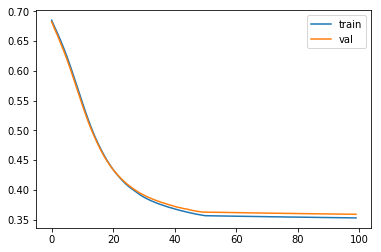

In [185]:
for epoch in range(epochs):
    batch_losses = []
    for i, (batch_x, batch_y) in enumerate(iterate_minibatches(x_tr[:], y_tr[:], 20)):       
        out = net(batch_x)
        target = batch_y

        sgd.zero_grad()
        loss = criterion(out, target)

        loss.backward()
        sgd.step()
        
        batch_losses.append(loss.item())

    train_losses.append(np.mean(batch_losses))
    
    val_losses.append(criterion(net(x_te), y_te).item())

    
    print("train", train_losses[-1])
    print("val", val_losses[-1])
    
    display.clear_output(wait=True)
    plt.plot(train_losses, label='train')
    plt.plot(val_losses, label='val')
    #plt.plot([i * train_adjs.shape[0] for i in range(1, len(test_losses) + 1)], test_losses, label='train')
    plt.legend()
    plt.show()

## save weights

In [191]:
torch.save(net.state_dict(), "./weights_4_8")

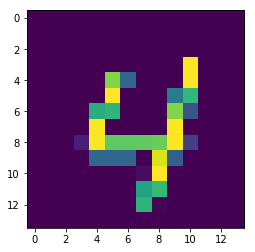

In [189]:
plt.imshow(x_tr[2][0].cpu().numpy())

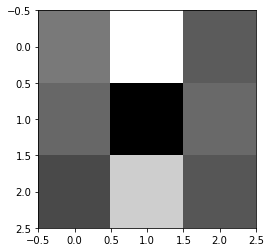

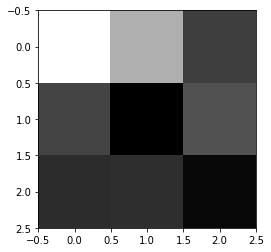

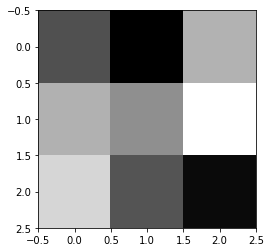

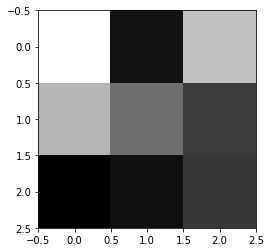

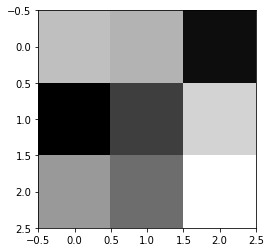

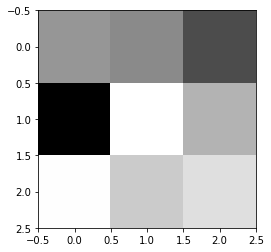

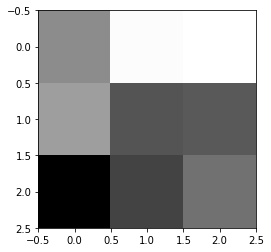

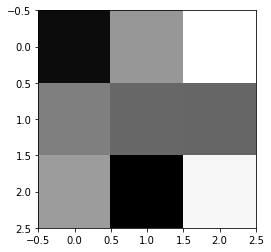

In [188]:
def draw_layer(arr):
    arr -= arr.min()
    arr /= arr.max()
    plt.imshow(arr, cmap='gray')
    plt.show()
    
for i in range(8):
    draw_layer(net.conv_1.weight[i][0].cpu().detach().numpy())